<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-group-photo/blob/master/smile_detection_with_landmarks_and_mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# initializing everything
pip install cmake
pip install numpy opencv-python dlib imutils

SyntaxError: ignored

In [8]:
#getting all the data
!wget -q  https://github.com/uol-mediaprocessing/group-projects-group-photo/raw/master/shape_predictor_68_face_landmarks.dat.bz2 -O shape_predictor_68_face_landmarks.dat.bz2
!ls -l
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
!ls -l

total 62544
drwxr-xr-x 1 root root     4096 Dec  6 16:53 sample_data
-rw-r--r-- 1 root root 64040097 Dec 12 12:25 shape_predictor_68_face_landmarks.dat.bz2
total 97364
drwxr-xr-x 1 root root     4096 Dec  6 16:53 sample_data
-rw-r--r-- 1 root root 99693937 Dec 12 12:25 shape_predictor_68_face_landmarks.dat


In [0]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

# set up the 68 point facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [10]:
# bring in the input image
!wget -q https://github.com/uol-mediaprocessing/group-projects-group-photo/raw/master/pictures/IMG_0894.JPG
!ls -l 
img = cv2.imread('IMG_0894.JPG', 1)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)

total 102176
-rw-r--r-- 1 root root  4925395 Dec 12 12:25 IMG_0894.JPG
drwxr-xr-x 1 root root     4096 Dec  6 16:53 sample_data
-rw-r--r-- 1 root root 99693937 Dec 12 12:25 shape_predictor_68_face_landmarks.dat


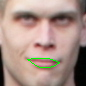

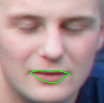

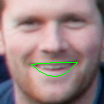

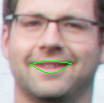

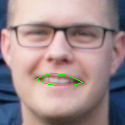

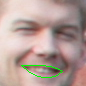

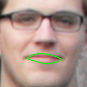

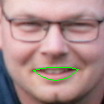

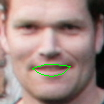

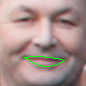

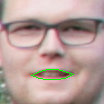

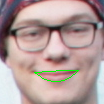

-----------


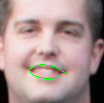

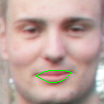

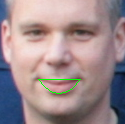

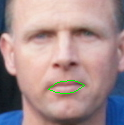

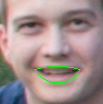

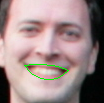

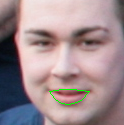

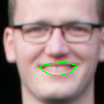

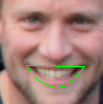

In [23]:
import numpy as np

def euclid_distance(a,b):
 return np.linalg.norm(np.asarray(a)-np.asarray(b))

def smile(mouth):
 A = euclid_distance(mouth[3], mouth[9])
 B = euclid_distance(mouth[2], mouth[10])
 C = euclid_distance(mouth[4], mouth[8])
 L = (A+B+C)/3
 D = euclid_distance(mouth[0], mouth[6])
 mar=L/D
 return mar

smiling = []
# loop through each face in image
for face in faces_in_image:

	# assign the facial landmarks
	landmarks = predictor(img_gray, face)

	# unpack the 68 landmark coordinates from the dlib object into a list 
	landmarks_list = []
	for i in range(0, landmarks.num_parts):
		landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))
	mouth = landmarks_list[48:69]
	mar = smile(mouth)
	mouth = np.asarray(mouth)
	mouthHull = cv2.convexHull(mouth)
	cv2.drawContours(img,[mouthHull],-1,(0,255,0),1)
	smiling.append(mar)
 

# visualise the image with landmarks
#cv2_imshow(img)
#print(smiling)
smiling_images = []
not_smiling_images = []
for i in range(len(faces_in_image)):
	x = faces_in_image[i].left()
	y = faces_in_image[i].top()
	w = faces_in_image[i].right()-x
	h = faces_in_image[i].bottom()-y
	crop_img = img[y:y+h, x:x+w]
	if smiling[i]<= .3 or smiling[i] > .38:
		smiling_images.append(crop_img)
	else:
		not_smiling_images.append(crop_img)

for image in smiling_images:
	cv2_imshow(image)
 
print("-----------")
for image in not_smiling_images:
	cv2_imshow(image)

## Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
#num_rows = 5
#num_cols = 3
#num_images = num_rows*num_cols
#plt.figure(figsize=(2*2*num_cols, 2*num_rows))
#for i in range(num_images):
#  plt.subplot(num_rows, 2*num_cols, 2*i+1)
#  plot_image(i, predictions[i], test_labels, test_images)
#  plt.subplot(num_rows, 2*num_cols, 2*i+2)
#  plot_value_array(i, predictions[i], test_labels)
#plt.tight_layout()
#plt.show()
